In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
# !pip install tensorflow-gpu==2.0.0

In [2]:
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import os
from tensorflow import keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# import pathlib
# data_dir = "/content/drive/My Drive/plant_disease"
# DATADIR = pathlib.Path(data_dir)
# train_dir="/content/drive/My Drive/plant_disease/train"
# test_dir="/content/drive/My Drive/plant_disease/test"
# TRAINDIR = pathlib.Path(train_dir)
# TESTDIR = pathlib.Path(test_dir)

In [3]:
import pathlib
data_dir = "C:/Users/Biswajit Satapathy/Desktop/study/plant_disease"
DATADIR = pathlib.Path(data_dir)
train_dir="C:/Users/Biswajit Satapathy/Desktop/study/plant_disease/train"
test_dir="C:/Users/Biswajit Satapathy/Desktop/study/plant_disease/test"
TRAINDIR = pathlib.Path(train_dir)
TESTDIR = pathlib.Path(test_dir)

In [6]:
 CATEGORIES = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Blueberry___healthy","Cherry_(including_sour)___healthy","Cherry_(including_sour)___Powdery_mildew","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_", "Corn_(maize)___healthy", "Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot","Grape___Esca_(Black_Measles)","Grape___healthy","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)","Orange___Haunglongbing_(Citrus_greening)","Peach___Bacterial_spot","Peach___healthy","Pepper,_bell___Bacterial_spot","Pepper,_bell___healthy","Potato___Early_blight", "Potato___healthy", "Potato___Late_blight","Raspberry___healthy","Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___healthy", "Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"] 

In [5]:
# CATEGORIES = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Blueberry___healthy","Cherry_(including_sour)___healthy","Cherry_(including_sour)___Powdery_mildew","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_", "Corn_(maize)___healthy", "Corn_(maize)___Northern_Leaf_Blight","Grape___Black_rot","Grape___Esca_(Black_Measles)","Grape___healthy","Grape___Leaf_blight_(Isariopsis_Leaf_Spot)","Orange___Haunglongbing_(Citrus_greening)","Peach___Bacterial_spot","Peach___healthy","Pepper,_bell___Bacterial_spot","Pepper,_bell___healthy","Potato___Early_blight", "Potato___healthy", "Potato___Late_blight","Raspberry___healthy","Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___healthy", "Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"] 


In [104]:
len(CATEGORIES)

34

In [105]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(TRAINDIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array)  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break
for category in CATEGORIES:  # do dogs and cats
    path1 = os.path.join(TESTDIR,category)  # create path to dogs and cats
    for img1 in os.listdir(path1):  # iterate over each image per dogs and cats
        img_array1 = cv2.imread(os.path.join(path1,img1) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array1, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break      

In [106]:
from tqdm import tqdm

In [107]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           vertical_flip=True,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           zoom_range=0.5
                                           ) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,
                                           horizontal_flip=True,
                                           vertical_flip=True,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           zoom_range=0.5
                                           ) # Generator for our validation data

In [108]:
batch_size = 16
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [109]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=TRAINDIR,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 62939 images belonging to 34 classes.


In [110]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=TESTDIR,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 15733 images belonging to 34 classes.


In [111]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),   
    Dropout(0.5),
    Dense(512, activation='relu'),
    Flatten(),
    Dense(34, activation='softmax')
])

In [93]:
# model = Sequential([
#     Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),  
#     Conv2D(32, 3, padding='same', activation='relu'),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Dropout(0.25),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),   
#     Dropout(0.25),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.50),
#     Dense(11, activation='softmax')
# ])

In [112]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 18, 18, 64)      

In [114]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=2007 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=206 // batch_size
)

Epoch 1/15
125/125 [==============================] - ETA: 5:28 - loss: 3.5319 - accuracy: 0.06 - ETA: 3:15 - loss: 4.3552 - accuracy: 0.03 - ETA: 2:31 - loss: 4.4349 - accuracy: 0.02 - ETA: 2:09 - loss: 4.1863 - accuracy: 0.03 - ETA: 1:56 - loss: 4.0883 - accuracy: 0.02 - ETA: 1:52 - loss: 3.9912 - accuracy: 0.02 - ETA: 1:51 - loss: 3.9275 - accuracy: 0.01 - ETA: 1:50 - loss: 3.8748 - accuracy: 0.02 - ETA: 1:47 - loss: 3.8360 - accuracy: 0.02 - ETA: 1:44 - loss: 3.8043 - accuracy: 0.02 - ETA: 1:43 - loss: 3.7788 - accuracy: 0.03 - ETA: 1:41 - loss: 3.7573 - accuracy: 0.03 - ETA: 1:42 - loss: 3.7396 - accuracy: 0.03 - ETA: 1:41 - loss: 3.7239 - accuracy: 0.03 - ETA: 1:38 - loss: 3.7095 - accuracy: 0.03 - ETA: 1:36 - loss: 3.6986 - accuracy: 0.03 - ETA: 1:33 - loss: 3.6877 - accuracy: 0.02 - ETA: 1:31 - loss: 3.6777 - accuracy: 0.03 - ETA: 1:29 - loss: 3.6675 - accuracy: 0.03 - ETA: 1:28 - loss: 3.6619 - accuracy: 0.03 - ETA: 1:25 - loss: 3.6575 - accuracy: 0.03 - ETA: 1:23 - loss: 3.65

125/125 [==============================] - ETA: 1:07 - loss: 2.7005 - accuracy: 0.31 - ETA: 1:06 - loss: 2.8570 - accuracy: 0.18 - ETA: 1:06 - loss: 2.7487 - accuracy: 0.22 - ETA: 1:05 - loss: 2.7539 - accuracy: 0.21 - ETA: 1:04 - loss: 2.6834 - accuracy: 0.21 - ETA: 1:03 - loss: 2.8253 - accuracy: 0.21 - ETA: 1:03 - loss: 2.8303 - accuracy: 0.23 - ETA: 1:02 - loss: 2.8189 - accuracy: 0.25 - ETA: 1:02 - loss: 2.7784 - accuracy: 0.24 - ETA: 1:01 - loss: 2.7626 - accuracy: 0.25 - ETA: 1:01 - loss: 2.8192 - accuracy: 0.25 - ETA: 1:00 - loss: 2.8756 - accuracy: 0.23 - ETA: 1:00 - loss: 2.8488 - accuracy: 0.25 - ETA: 1:00 - loss: 2.8115 - accuracy: 0.26 - ETA: 59s - loss: 2.8218 - accuracy: 0.2500 - ETA: 59s - loss: 2.8407 - accuracy: 0.238 - ETA: 58s - loss: 2.8553 - accuracy: 0.227 - ETA: 58s - loss: 2.8817 - accuracy: 0.222 - ETA: 57s - loss: 2.8843 - accuracy: 0.213 - ETA: 56s - loss: 2.8608 - accuracy: 0.218 - ETA: 56s - loss: 2.8629 - accuracy: 0.223 - ETA: 55s - loss: 2.8686 - accura

125/125 [==============================] - ETA: 1:06 - loss: 1.6132 - accuracy: 0.43 - ETA: 1:06 - loss: 2.0032 - accuracy: 0.37 - ETA: 1:06 - loss: 2.0929 - accuracy: 0.31 - ETA: 1:05 - loss: 2.0798 - accuracy: 0.34 - ETA: 1:05 - loss: 2.1223 - accuracy: 0.31 - ETA: 1:04 - loss: 2.0760 - accuracy: 0.33 - ETA: 1:04 - loss: 2.0417 - accuracy: 0.34 - ETA: 1:04 - loss: 2.0602 - accuracy: 0.34 - ETA: 1:03 - loss: 2.0876 - accuracy: 0.33 - ETA: 1:02 - loss: 2.0650 - accuracy: 0.35 - ETA: 1:02 - loss: 2.0599 - accuracy: 0.36 - ETA: 1:01 - loss: 2.0917 - accuracy: 0.35 - ETA: 1:01 - loss: 2.0511 - accuracy: 0.36 - ETA: 1:00 - loss: 2.0899 - accuracy: 0.35 - ETA: 59s - loss: 2.0675 - accuracy: 0.3625 - ETA: 59s - loss: 2.1290 - accuracy: 0.343 - ETA: 58s - loss: 2.1484 - accuracy: 0.334 - ETA: 58s - loss: 2.1943 - accuracy: 0.326 - ETA: 57s - loss: 2.1777 - accuracy: 0.328 - ETA: 57s - loss: 2.1523 - accuracy: 0.340 - ETA: 56s - loss: 2.1238 - accuracy: 0.348 - ETA: 55s - loss: 2.1143 - accura

125/125 [==============================] - ETA: 1:09 - loss: 2.5454 - accuracy: 0.43 - ETA: 1:07 - loss: 2.3825 - accuracy: 0.37 - ETA: 1:06 - loss: 2.5469 - accuracy: 0.29 - ETA: 1:05 - loss: 2.3589 - accuracy: 0.35 - ETA: 1:05 - loss: 2.2994 - accuracy: 0.36 - ETA: 1:05 - loss: 2.1942 - accuracy: 0.36 - ETA: 1:04 - loss: 2.2000 - accuracy: 0.34 - ETA: 1:03 - loss: 2.1916 - accuracy: 0.36 - ETA: 1:03 - loss: 2.1593 - accuracy: 0.38 - ETA: 1:02 - loss: 2.1798 - accuracy: 0.38 - ETA: 1:02 - loss: 2.1383 - accuracy: 0.38 - ETA: 1:01 - loss: 2.0795 - accuracy: 0.41 - ETA: 1:01 - loss: 2.1061 - accuracy: 0.40 - ETA: 1:00 - loss: 2.0895 - accuracy: 0.40 - ETA: 59s - loss: 2.0731 - accuracy: 0.4042 - ETA: 59s - loss: 2.0093 - accuracy: 0.425 - ETA: 58s - loss: 1.9888 - accuracy: 0.422 - ETA: 58s - loss: 1.9654 - accuracy: 0.430 - ETA: 57s - loss: 1.9863 - accuracy: 0.421 - ETA: 57s - loss: 1.9855 - accuracy: 0.421 - ETA: 56s - loss: 1.9939 - accuracy: 0.416 - ETA: 55s - loss: 2.0004 - accura

125/125 [==============================] - ETA: 1:12 - loss: 1.8575 - accuracy: 0.56 - ETA: 1:09 - loss: 1.8672 - accuracy: 0.43 - ETA: 1:08 - loss: 1.8629 - accuracy: 0.47 - ETA: 1:09 - loss: 1.8456 - accuracy: 0.46 - ETA: 1:07 - loss: 1.7710 - accuracy: 0.46 - ETA: 1:06 - loss: 1.7290 - accuracy: 0.48 - ETA: 1:06 - loss: 1.7527 - accuracy: 0.46 - ETA: 1:05 - loss: 1.8176 - accuracy: 0.44 - ETA: 1:05 - loss: 1.7667 - accuracy: 0.44 - ETA: 1:04 - loss: 1.7643 - accuracy: 0.45 - ETA: 1:04 - loss: 1.7536 - accuracy: 0.46 - ETA: 1:03 - loss: 1.7469 - accuracy: 0.45 - ETA: 1:02 - loss: 1.7861 - accuracy: 0.44 - ETA: 1:02 - loss: 1.8286 - accuracy: 0.44 - ETA: 1:01 - loss: 1.7881 - accuracy: 0.45 - ETA: 1:00 - loss: 1.8009 - accuracy: 0.45 - ETA: 1:00 - loss: 1.7814 - accuracy: 0.46 - ETA: 59s - loss: 1.7638 - accuracy: 0.4688 - ETA: 59s - loss: 1.7812 - accuracy: 0.470 - ETA: 58s - loss: 1.7907 - accuracy: 0.465 - ETA: 57s - loss: 1.7940 - accuracy: 0.467 - ETA: 57s - loss: 1.7999 - accura

125/125 [==============================] - ETA: 1:06 - loss: 2.0769 - accuracy: 0.37 - ETA: 1:05 - loss: 1.5733 - accuracy: 0.53 - ETA: 1:06 - loss: 1.5192 - accuracy: 0.50 - ETA: 1:05 - loss: 1.5327 - accuracy: 0.51 - ETA: 1:04 - loss: 1.4371 - accuracy: 0.52 - ETA: 1:04 - loss: 1.4849 - accuracy: 0.52 - ETA: 1:02 - loss: 1.5546 - accuracy: 0.50 - ETA: 1:00 - loss: 1.5971 - accuracy: 0.50 - ETA: 1:00 - loss: 1.5454 - accuracy: 0.51 - ETA: 59s - loss: 1.5924 - accuracy: 0.5000 - ETA: 59s - loss: 1.5468 - accuracy: 0.511 - ETA: 59s - loss: 1.5168 - accuracy: 0.520 - ETA: 58s - loss: 1.4993 - accuracy: 0.524 - ETA: 58s - loss: 1.4827 - accuracy: 0.535 - ETA: 58s - loss: 1.4597 - accuracy: 0.545 - ETA: 57s - loss: 1.4261 - accuracy: 0.562 - ETA: 57s - loss: 1.4396 - accuracy: 0.562 - ETA: 56s - loss: 1.4513 - accuracy: 0.566 - ETA: 56s - loss: 1.4433 - accuracy: 0.569 - ETA: 55s - loss: 1.4449 - accuracy: 0.568 - ETA: 55s - loss: 1.4396 - accuracy: 0.565 - ETA: 55s - loss: 1.4459 - accura

125/125 [==============================] - ETA: 1:09 - loss: 1.2742 - accuracy: 0.62 - ETA: 1:08 - loss: 1.2555 - accuracy: 0.59 - ETA: 1:08 - loss: 1.4511 - accuracy: 0.56 - ETA: 1:08 - loss: 1.4573 - accuracy: 0.56 - ETA: 1:07 - loss: 1.4507 - accuracy: 0.56 - ETA: 1:07 - loss: 1.3850 - accuracy: 0.57 - ETA: 1:06 - loss: 1.3455 - accuracy: 0.58 - ETA: 1:05 - loss: 1.4346 - accuracy: 0.57 - ETA: 1:04 - loss: 1.5196 - accuracy: 0.55 - ETA: 1:04 - loss: 1.5657 - accuracy: 0.54 - ETA: 1:03 - loss: 1.4975 - accuracy: 0.56 - ETA: 1:02 - loss: 1.4776 - accuracy: 0.57 - ETA: 1:02 - loss: 1.4849 - accuracy: 0.55 - ETA: 1:01 - loss: 1.4678 - accuracy: 0.55 - ETA: 1:01 - loss: 1.4271 - accuracy: 0.56 - ETA: 1:00 - loss: 1.4301 - accuracy: 0.56 - ETA: 1:00 - loss: 1.4428 - accuracy: 0.56 - ETA: 59s - loss: 1.4430 - accuracy: 0.5625 - ETA: 59s - loss: 1.4421 - accuracy: 0.559 - ETA: 58s - loss: 1.4390 - accuracy: 0.562 - ETA: 58s - loss: 1.4099 - accuracy: 0.574 - ETA: 57s - loss: 1.4042 - accura

125/125 [==============================] - ETA: 1:09 - loss: 1.5258 - accuracy: 0.37 - ETA: 1:06 - loss: 1.3250 - accuracy: 0.46 - ETA: 1:06 - loss: 1.3788 - accuracy: 0.50 - ETA: 1:05 - loss: 1.2907 - accuracy: 0.51 - ETA: 1:05 - loss: 1.2793 - accuracy: 0.53 - ETA: 1:04 - loss: 1.2969 - accuracy: 0.55 - ETA: 1:04 - loss: 1.2441 - accuracy: 0.57 - ETA: 1:03 - loss: 1.2946 - accuracy: 0.57 - ETA: 1:02 - loss: 1.2834 - accuracy: 0.57 - ETA: 1:02 - loss: 1.3314 - accuracy: 0.58 - ETA: 1:01 - loss: 1.2665 - accuracy: 0.61 - ETA: 1:01 - loss: 1.3039 - accuracy: 0.59 - ETA: 1:00 - loss: 1.2810 - accuracy: 0.60 - ETA: 1:00 - loss: 1.2369 - accuracy: 0.62 - ETA: 59s - loss: 1.1975 - accuracy: 0.6417 - ETA: 58s - loss: 1.1831 - accuracy: 0.648 - ETA: 58s - loss: 1.2368 - accuracy: 0.643 - ETA: 57s - loss: 1.2197 - accuracy: 0.652 - ETA: 57s - loss: 1.2442 - accuracy: 0.644 - ETA: 56s - loss: 1.2626 - accuracy: 0.640 - ETA: 56s - loss: 1.2537 - accuracy: 0.642 - ETA: 55s - loss: 1.2506 - accura

[0.0455, 0.137, 0.248, 0.314, 0.3795, 0.413, 0.4455, 0.475, 0.5045, 0.5025, 0.53082705, 0.554, 0.5455, 0.565, 0.577]


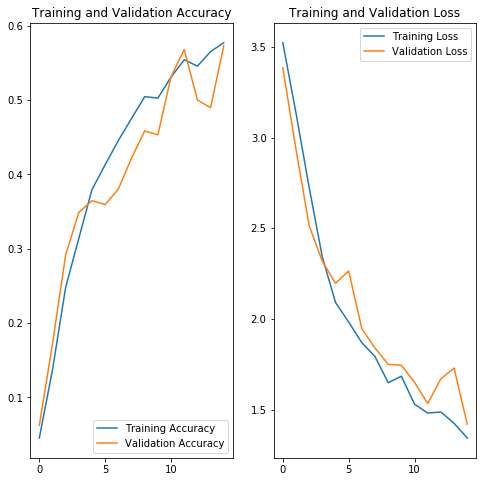

In [115]:
acc = history.history['accuracy']
print(acc)
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [4]:
 model.save('plant_disease.h5')

In [2]:
import cv2
import numpy as np

In [3]:
from tensorflow.keras import models,layers,optimizers

In [4]:
model1=models.load_model('plant_disease.h5',compile=True)

In [2]:
# model1.hist()

In [4]:
img3 = cv2.imread(r"C:\Users\Biswajit Satapathy\Desktop\study\pe.jpg",1)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(150,150))
print(img3.shape)
img4 = np.reshape(img3,[1,150,150,3])
img4=img4/255.0


(150, 150, 3)


In [7]:
disease = model1.predict_classes(img4)
prediction = disease[0]
print(CATEGORIES[prediction])

Potato___Early_blight
